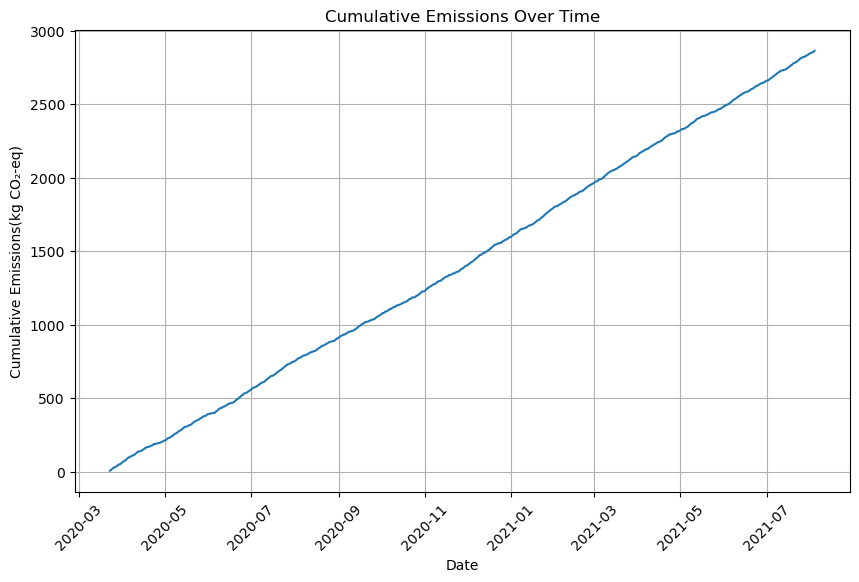

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load synthetic data
synthetic_data_path = "synthetic_data.csv"
synthetic_data = pd.read_csv(synthetic_data_path)

# Ensure the 'timestamp' column is formatted as datetime
synthetic_data['timestamp'] = pd.to_datetime(synthetic_data['timestamp'], errors='coerce')

# Aggregate emissions by date and calculate daily emissions
synthetic_data['date'] = synthetic_data['timestamp'].dt.date
daily_emissions = synthetic_data.groupby('date')['emissions'].sum().reset_index()
daily_emissions.columns = ['date', 'daily_emissions']

# Calculate cumulative emissions
daily_emissions['cumulative_emissions'] = daily_emissions['daily_emissions'].cumsum()

# Using Matplotlib and Seaborn to Plot Static Line Charts
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cumulative_emissions', data=daily_emissions)
plt.title('Cumulative Emissions Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Emissions(kg CO₂-eq)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Duration bins boundaries: [ 9.961 17.8   25.6   33.4   41.2   49.   ]
duration_bin
Q1     58
Q2     82
Q3    138
Q4    130
Q5     92
Name: count, dtype: int64


/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/2556118039.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency = data.groupby(['duration_bin', 'project_name']).size().unstack(fill_value=0)
/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/2556118039.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values.index, y=values.values, ax=ax, palette='PRGn_r')
/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/2556118039.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

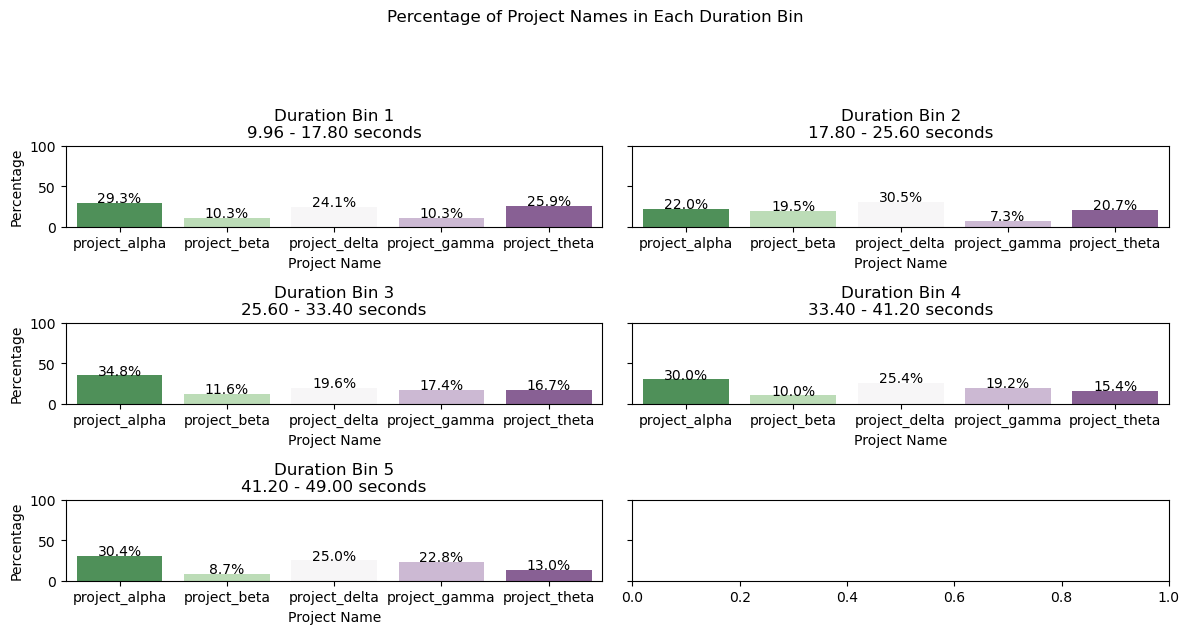

In [25]:
# Load the data
file_path = 'synthetic_data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Divide 'duration' into five equal intervals and label them from Q1 to Q5
data['duration_bin'], bins = pd.cut(data['duration'], bins=5, retbins=True, labels=[f'Q{i}' for i in range(1, 6)])

# Print the boundaries of the duration bins
print("Duration bins boundaries:", bins)

# Display the number of entries in each interval
print(data['duration_bin'].value_counts().sort_index())

# Calculate the frequency of each project_name in each interval
frequency = data.groupby(['duration_bin', 'project_name']).size().unstack(fill_value=0)

# Calculate the percentage of each project_name in each interval
percentage = frequency.div(frequency.sum(axis=1), axis=0) * 100

# Create a subplot layout
fig, axes = plt.subplots(3, 2, figsize=(12, 6), sharey=True)

# Plot each subplot
for i, (duration_bin, ax) in enumerate(zip(percentage.index, axes.flatten()), 1):
    values = percentage.loc[duration_bin]
    sns.barplot(x=values.index, y=values.values, ax=ax, palette='PRGn_r')
    for index, value in enumerate(values):
        ax.text(index, value + 1, f'{value:.1f}%', ha='center')
    ax.set_title(f'Duration Bin {i}\n{bins[i-1]:.2f} - {bins[i]:.2f} seconds')
    ax.set_xlabel('Project Name')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)

# Set the overall title
plt.suptitle('Percentage of Project Names in Each Duration Bin', y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/3149282957.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=project_distribution.index, y=project_distribution[bin_label], ax=ax, palette="PRGn_r")
/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/3149282957.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=project_distribution.index, y=project_distribution[bin_label], ax=ax, palette="PRGn_r")
/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/3149282957.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

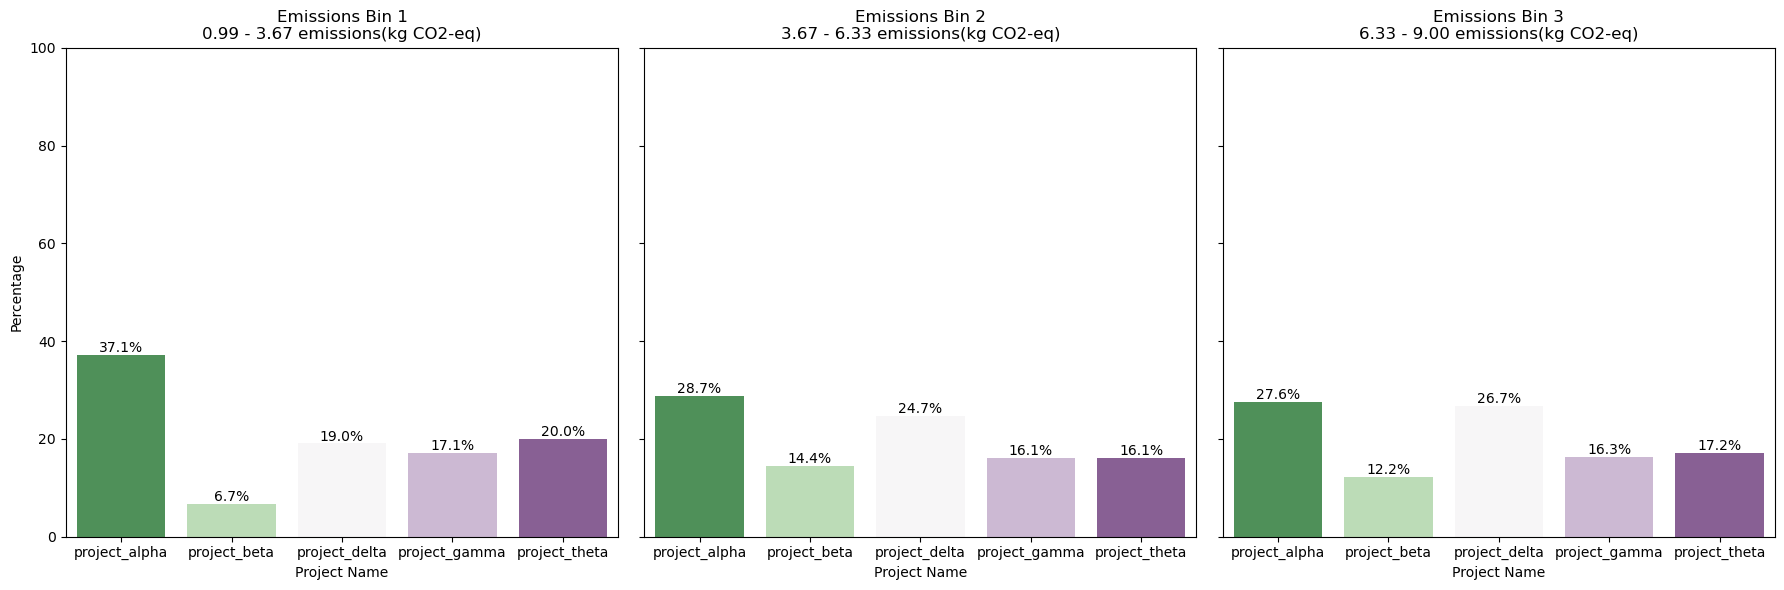

In [24]:
# Create bins for emissions
bin_edges = [0.99, 3.67, 6.33, 9.00]
bin_labels = ['Emissions Bin 1 (0.99 - 3.67)', 'Emissions Bin 2 (3.67 - 6.33)', 'Emissions Bin 3 (6.33 - 9.00)']
data['emissions_bin'] = pd.cut(data['emissions'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Calculate the percentage of each project in each emissions bin
project_distribution = pd.crosstab(data['project_name'], data['emissions_bin'], normalize='columns') * 100

# Set up the figure and axes for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Titles for each bin with specific details
bin_titles = [
    "Emissions Bin 1\n0.99 - 3.67 emissions(kg CO2-eq)",
    "Emissions Bin 2\n3.67 - 6.33 emissions(kg CO2-eq)",
    "Emissions Bin 3\n6.33 - 9.00 emissions(kg CO2-eq)"
]

# Plotting each bin in a separate subplot
for ax, bin_label, title in zip(axes, project_distribution.columns, bin_titles):
    sns.barplot(x=project_distribution.index, y=project_distribution[bin_label], ax=ax, palette="PRGn_r")
    ax.set_title(title)
    ax.set_xlabel('Project Name')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Uniform y-axis limits
    # Add percentage labels on each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

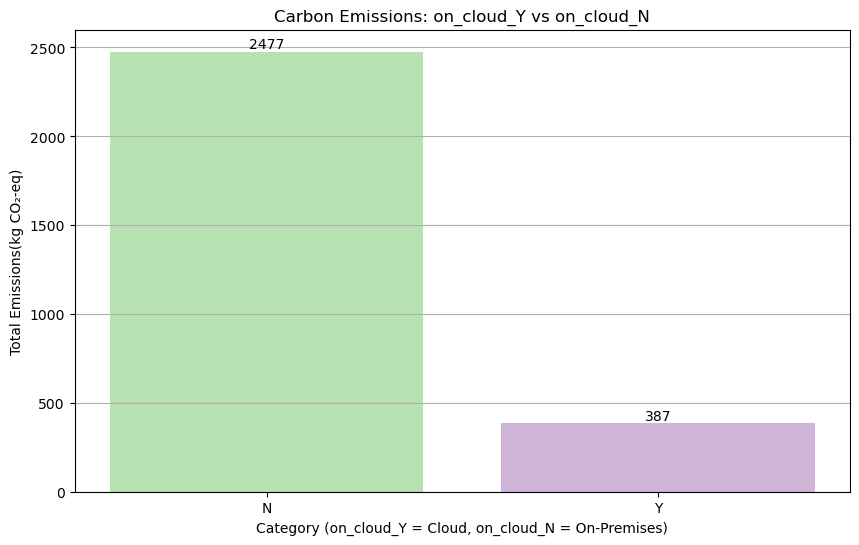

In [28]:
# Calculate total emissions for cloud and on-premises
emissions_by_category = data.groupby('on_cloud')['emissions'].sum().reset_index()
emissions_by_category.columns = ['Category', 'Total Emissions']

# Retrieve colours from the PRGn_r colour palette
palette = sns.color_palette("PRGn_r", 2)

# Plot a bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(emissions_by_category['Category'], emissions_by_category['Total Emissions'], color=palette)

# Add labels at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.title('Carbon Emissions: on_cloud_Y vs on_cloud_N')
plt.xlabel('Category (on_cloud_Y = Cloud, on_cloud_N = On-Premises)')
plt.ylabel('Total Emissions(kg CO₂-eq)')
plt.grid(True, axis='y')
plt.show()

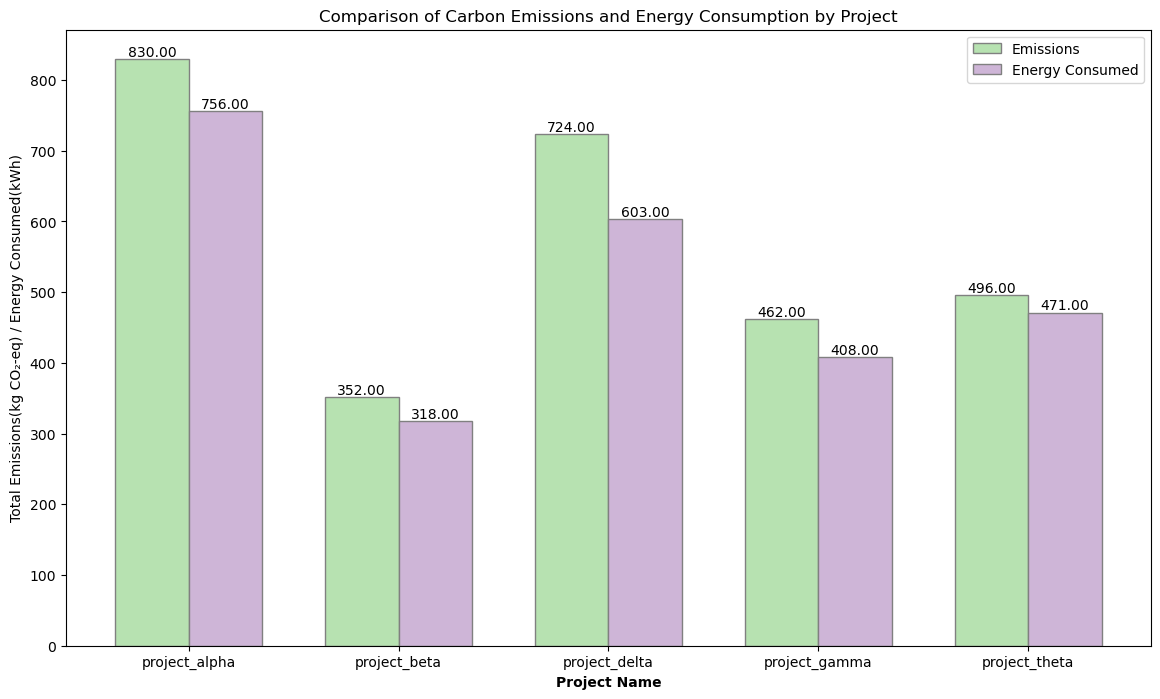

In [34]:
# Group by project and calculate total emissions and energy consumption
project_stats = data.groupby('project_name')[['emissions', 'energy_consumed']].sum().reset_index()

# Set bar width and positions
bar_width = 0.35
r1 = range(len(project_stats))
r2 = [x + bar_width for x in r1]

# Retrieve colours from the PRGn_r color palette
palette = sns.color_palette("PRGn_r", 2)

# Plot a grouped bar chart
plt.figure(figsize=(14, 8))
plt.bar(r1, project_stats['emissions'], color=palette[0], width=bar_width, edgecolor='grey', label='Emissions')
plt.bar(r2, project_stats['energy_consumed'], color=palette[1], width=bar_width, edgecolor='grey', label='Energy Consumed')

# Add labels
plt.xlabel('Project Name', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(project_stats))], project_stats['project_name'])
plt.ylabel('Total Emissions(kg CO₂-eq) / Energy Consumed(kWh)')
plt.title('Comparison of Carbon Emissions and Energy Consumption by Project')
plt.legend()

# Add values on top of the bars
for i in range(len(project_stats)):
    plt.text(r1[i], project_stats['emissions'][i], f'{project_stats["emissions"][i]:.2f}', ha='center', va='bottom')
    plt.text(r2[i], project_stats['energy_consumed'][i], f'{project_stats["energy_consumed"][i]:.2f}', ha='center', va='bottom')

plt.show()

/var/folders/b9/7_zykpw135qfr8x0cfbw2d6r0000gn/T/ipykernel_80184/673809595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='project_name', y='emissions_rate', palette='PRGn_r', data=project_efficiency)


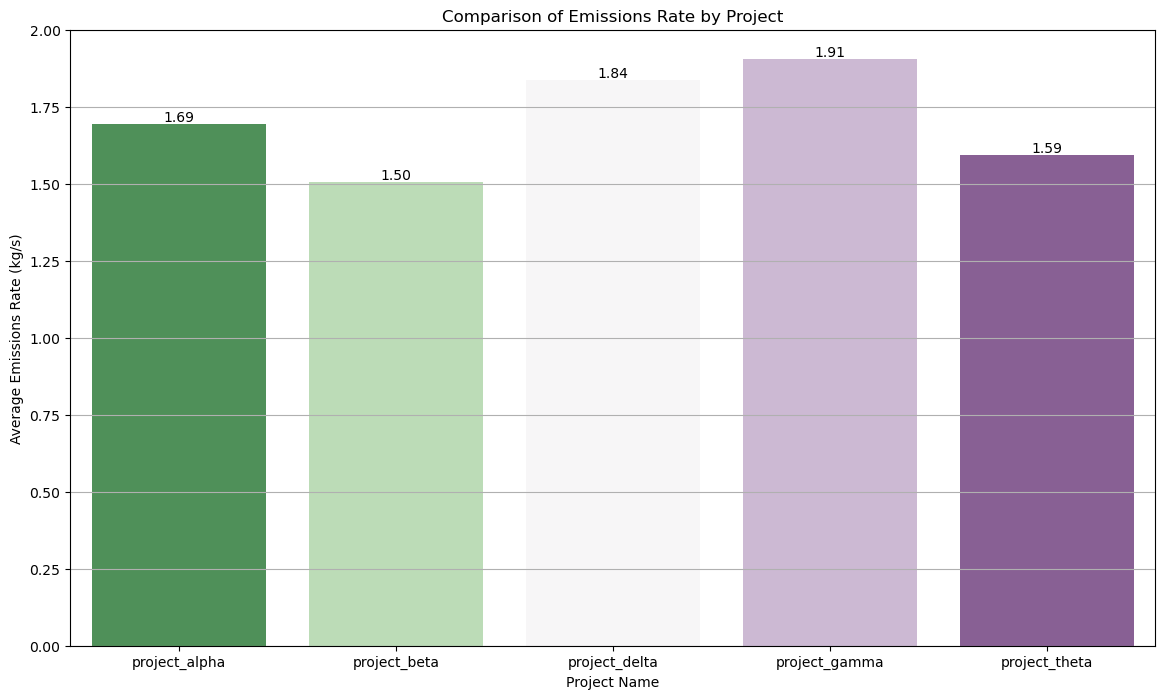

In [35]:
# Calculate carbon emissions efficiency for each project (emissions_rate = emissions / energy_consumed)
data['emissions_rate'] = data['emissions'] / data['energy_consumed']

# Compute the average carbon emissions efficiency per project
project_efficiency = data.groupby('project_name')['emissions_rate'].mean().reset_index()

# Set up the plotting area
plt.figure(figsize=(14, 8))

# Plot the carbon emissions efficiency for different projects as a bar chart
bars = sns.barplot(x='project_name', y='emissions_rate', palette='PRGn_r', data=project_efficiency)

# Annotate values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Set title and labels
plt.title('Comparison of Emissions Rate by Project')
plt.xlabel('Project Name')
plt.ylabel('Average Emissions Rate (kg/s)')
plt.grid(True, axis='y')

# Display the chart
plt.show()